In [34]:
#Imports
import pandas as pd
import numpy as np 
import nibabel as nib
import nilearn

from nilearn import plotting, image
from nilearn.glm.first_level import compute_regressor
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.glm.first_level import FirstLevelModel
from nilearn.plotting import plot_design_matrix


In [3]:
#Init variables
init_folder='/home/traaffneu/margal/code/multirat_se'
analysis_folder='/project/4180000.19/multirat_stim'

#Data path
subject_path = '/project/4180000.19/multirat_stim/rabies_test/preprocess/bold_datasink/commonspace_bold/_scan_info_subject_id0200200.session1_split_name_sub-0200200_ses-1_T2w/_run_1/sub-0200200_ses-1_run-1_bold_combined.nii.gz'
template_path ='/groupshare/traaffneu/preclinimg/templates/SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Anatomical_Imaging/SIGMA_Rat_Anatomical_InVivo_Template/SIGMA_InVivo_Brain_Template.nii'
rat_subj = 200200

In [23]:
#Events file - data frame
metadata = pd.read_csv('/project/4180000.19/multirat_stim/MultiRat_SE_metadata - multiRat_stim.tsv', sep='\t', header=0, index_col=3)
onset = np.matrix(metadata.loc[rat_subj,'func.sensory.onset']).A[0]
duration = np.matrix(metadata.loc[rat_subj,'func.sensory.duration']).A[0]
events = pd.DataFrame({'onset': onset,'duration': duration})

print(events)
print('onset: ', onset)
print('duration: ', duration)

   onset  duration
0     30         6
1    120         6
2    210         6
3    200         6
4    390         6
5    480         6
onset:  [ 30 120 210 200 390 480]
duration:  [6 6 6 6 6 6]


In [46]:
#Define variables 
tr = 1.0
n_scans = 325 #nb volumes
frame_times = np.arange(n_scans) * tr  # corresponding frame times
amplitude = np.array([1, 1, 1, 1, 1, 1], dtype=object) #6 events
exp_condition = np.array((onset, duration, amplitude), dtype=object)
hrf_model = 'spm'

In [48]:
#Compute regressors 
signal, name = nilearn.glm.first_level.compute_regressor(exp_condition, hrf_model, frame_times)

       dummy   drift_1   drift_2   drift_3  constant
0.0      0.0 -0.500000  0.166152 -0.049538       1.0
1.0      0.0 -0.496914  0.163075 -0.047703       1.0
2.0      0.0 -0.493827  0.160018 -0.045897       1.0
3.0      0.0 -0.490741  0.156979 -0.044119       1.0
4.0      0.0 -0.487654  0.153959 -0.042369       1.0
...      ...       ...       ...       ...       ...
320.0    0.0  0.487654  0.153959  0.042369       1.0
321.0    0.0  0.490741  0.156979  0.044119       1.0
322.0    0.0  0.493827  0.160018  0.045897       1.0
323.0    0.0  0.496914  0.163075  0.047703       1.0
324.0    0.0  0.500000  0.166152  0.049538       1.0

[325 rows x 5 columns]


/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:74: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn("'trial_type' column not found "
/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:74: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn("'trial_type' column not found "


<AxesSubplot: label='conditions', ylabel='scan number'>

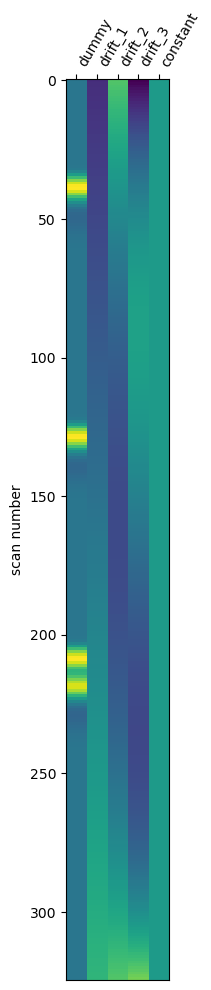

In [53]:
#Compute design matrix
design_matrices = make_first_level_design_matrix(frame_times, events, drift_model='polynomial', drift_order=3, hrf_model=hrf_model)
design = make_first_level_design_matrix(
    frame_times, events, drift_model='polynomial', drift_order=3, hrf_model=hrf_model)

print(design)
plot_design_matrix(design)

In [51]:
#Fitting a first-level model
fmri_glm = FirstLevelModel()
fmri_glm = fmri_glm.fit(subject_path, design_matrices=design)

Contrasts:  [1. 0. 0. 0. 0.]


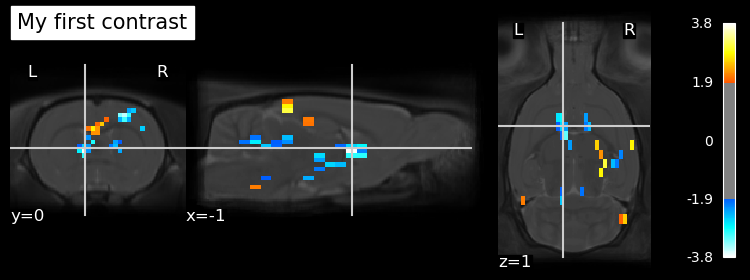

In [52]:
#Coompute contrasts 
n_columns = design.shape[1]
contrast_val = np.hstack(([1], np.zeros(n_columns - 1)))
print('Contrasts: ', contrast_val)

summary_statistics= fmri_glm.compute_contrast(contrast_val, output_type='all')

plotting.plot_stat_map(summary_statistics['z_score'], bg_img = template_path, threshold = 1.9, title = 'My first contrast')
